## Week Three - Part 2 - Network Analysis: 2-Mode Networks:
## CUNY MSDS DATA620 - Web Analytics
---
### Team5: Christopher Estevez, Meaghan Burke, Rickidon Singh,  Ritesh Lohiya, Rose Koh
### 06/25/2018 (due date)
##### python version: 2.7
---

## Assignment Description

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:
   
   1.Brief Description: http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis.   
    [For more background information, see also:http://rpackages.ianhowson.com/cran/latentnet/man/davis.html].  
    Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network 
    algorithms.
   
   2.Dataset: http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat
   
   3.Python code to create dataset: https://networkx.readthedocs.io/en/stable/examples/algorithms/davis_club.html

**BACKGROUND**
These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. 

**REFERENCES**
* Breiger R. (1974). The duality of persons and groups. Social Forces, 53, 181-190. 
* Davis, A et al. (1941). Deep South. Chicago: University of Chicago Pres

In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd

In [9]:

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']
#print("Biadjacency matrix")
#print(bipartite.biadjacency_matrix(G, women, clubs))
print nx.info(G)


Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


In [44]:
# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
pd.DataFrame(list(W.degree()),columns=["Member","#Friends"]).sort_values('#Friends', ascending=False)


,Member,#Friends
0,Theresa Anderson,17
5,Sylvia Avondale,17
14,Evelyn Jefferson,17
12,Ruth DeSand,17
6,Verne Sanderson,17
17,Helen Lloyd,17
4,Nora Fayette,17
1,Pearl Oglethorpe,16
11,Dorothy Murchison,16
3,Katherina Rogers,16


In [43]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
pd.DataFrame(list(W.degree(W, weight='weight')),columns=["Member","#Meetings"]).sort_values('#Meetings', ascending=False)


,Member,#Meetings
0,Theresa Anderson,57
14,Evelyn Jefferson,50
5,Sylvia Avondale,46
8,Brenda Rogers,46
13,Laura Mandeville,45
4,Nora Fayette,43
12,Ruth DeSand,40
6,Verne Sanderson,38
3,Katherina Rogers,37
9,Eleanor Nye,36


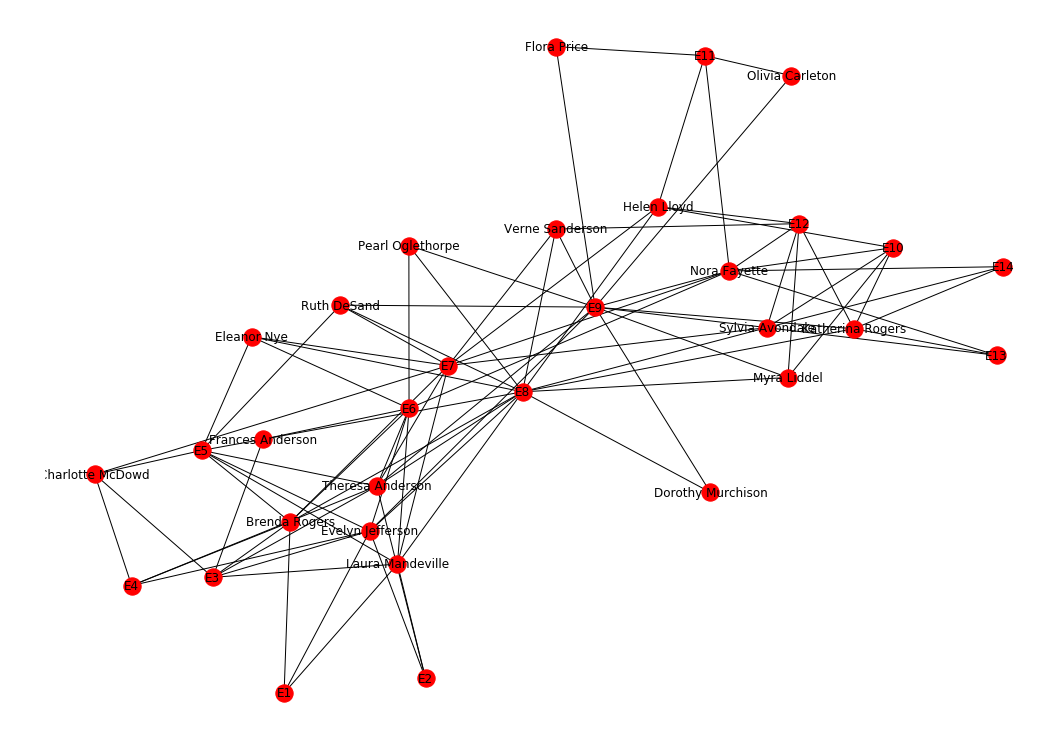

In [8]:
plt.figure(figsize=(14, 10))
nx.draw(G,with_labels = True)
plt.show()